# Change `Runtime`
Click `Runtime`, and click `Change runtime type`.

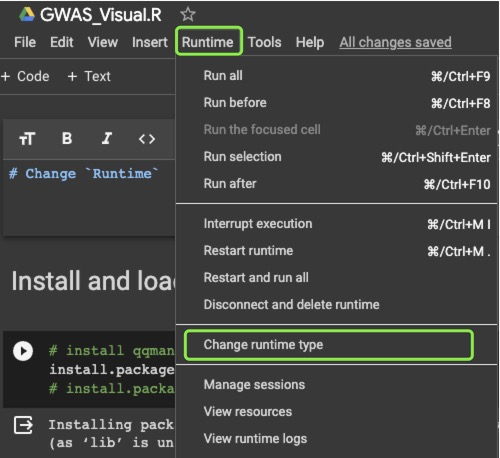



In the window that opens, select `R` as the Runtime type and then click `Save`

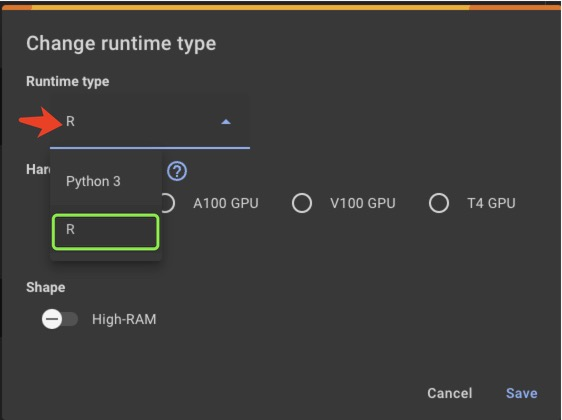

# Install and load packages

In [ ]:
# install qqman
install.packages('qqman')
# install.packages ('tidyverse`)

In [ ]:
library(tidyverse)
library(qqman)

# PCA plot
Load the sample information for 1000 Genomes (sample ID, population, and super population):

In [ ]:
# Load the sample information for 1000 Genomes (sample ID, population, and super population) from github:
info <- read_tsv("https://raw.githubusercontent.com/OchoaLab/genomic-modules/refs/heads/main/day2/Exercise/data/sample_population_info_1kgp.tsv")
head(info)


In [ ]:
# Load PCA results:
data <- read_tsv("https://raw.githubusercontent.com/OchoaLab/genomic-modules/refs/heads/main/day2/Exercise/result/African.filtered.eigenvec")
head(data)

In [ ]:
# Use the left_join() function to map the sample ID to their corresponding population info:
data <- left_join(data, info, by = c("#IID" = "Sample"))
head(data)

Plot the first two PCs, which reveal the principal axes of variation of allele frequencies in our African samples. You should see the following plot of individuals in PCA space, colored according to their population. PC1 distinguishes admixed populations (ASW, ACB, both of which have some European ancestry) from the rest of the populations, which are practically unadmixed. In contrast, PC2 distinguishes far Western African ancestry (GWD and MSL) from central populations, which also share linguistic connections.

In [ ]:
# PCA plot of the first two components
# label by population info
ggplot(data, aes(x = PC1, y = PC2, color = Population)) + geom_point()

# Manhattan plot

In [ ]:
# Load the association table:
result <- read_tsv("https://raw.githubusercontent.com/OchoaLab/genomic-modules/refs/heads/main/day2/Exercise/result/African.filtered.PHENO1.glm.logistic.hybrid")
# Edit the column names to match what the manhattan function prefers:
colnames(result)[1:3] <- c("CHR","BP","SNP")
head(result)

In [ ]:
# Load the list of causal variants:
causal_variants <- read_lines("https://raw.githubusercontent.com/OchoaLab/genomic-modules/refs/heads/main/day2/Exercise/data/variant_ID_APOL1_G1_and_G2.txt")
causal_variants

Make the Manhattan plot, which reveals the locations of associated variants.  Each point is a variant, points above the red line are usually significant, and points above the blue line are considered "suggestive".  Since we simulated the trait, we know which are the two true causal variants, which we highlighted in green.  Note that several non-causal variants are also significant, which are neighbors of the causal ones and appear significant due to linkage disequilibrium (LD).  The smaller peak on the far right is not significant and is not a true association either (it's important not to overinterpret such weaker peaks)!

In [ ]:
# manhattan plot
manhattan(result, highlight = causal_variants)

# Quantile-Quantile (QQ) plot

Lastly, we make the QQ plot, which tells if the association study as a whole appears accurate or not.
On the x-axis are the expected quantiles of p-values when there is no association (p-values should be uniform), and on the y-axis are the observed quantiles.
When the test is well calibrated, the data curve is near the y=x (red) line for large p-values (small -log10 p-values), and as p-values become smaller there is greater departure from the red line because of the true associations.
However, if the test is not well-calibrated (often called "inflated"), which happens for a variety of interesting reasons, the data curve departs from the red line much sooner than expected, in which case null p-values are not actually uniform and the significant results cannot be trusted (technically, the test is not correctly controlling the type I error).
This case looks quite good considering our small sample size and the skewed proportion of cases and controls (ideally it should be 1:1 for this test).

In [ ]:
# qqplot
qq(result$P, main = "QQ Plot")